#  Group Project Financial Base Table

#### Check for library requirements & install if missing

In [1]:
import sys
import subprocess
import importlib

packages = ['pandas', 'numpy','pathlib','os','glob', 'textblob']
[subprocess.check_call(['pip', 'install', pkg]) 
for pkg in packages if not importlib.util.find_spec(pkg)]

[]

#### Import libraries

In [2]:
import pandas as pd
import numpy as np

from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pathlib
import os
import glob

from textblob import TextBlob

#### Set working directory

In [3]:
data_folder = Path(os.getcwd() + "/FP_GroupProject/data/raw/data_berka")

In [4]:
# Change to working dir
os.chdir(data_folder)

#### Read data

In [5]:
# Loop through data folder and add all df's in a dict
data_dict={}
for txt_file in glob.glob("*.asc"):
    #list filenames
    filename = txt_file
    #create python tablenames
    df_name = str.replace(txt_file,".asc","_raw") 
    #read files
    df_value = pd.read_csv(filename,  delimiter=";")
    #add to dict
    data_dict[df_name] = df_value


C:\Users\irana\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# Split dict into indivisual dataframes
for var in data_dict.keys():
    exec("{} = data_dict['{}']".format(var, var))

In [7]:
data_dict.keys()

dict_keys(['account_raw', 'card_raw', 'client_raw', 'disp_raw', 'district_raw', 'loan_raw', 'order_raw', 'trans_raw'])

In [8]:
# Check for null values
for keys in data_dict.keys():
    print(keys, ":", data_dict[keys].isna().sum().sum())

account_raw : 0
card_raw : 0
client_raw : 0
disp_raw : 0
district_raw : 0
loan_raw : 0
order_raw : 0
trans_raw : 2208738


### Data exploration

In [9]:
account = account_raw
card = card_raw
client = client_raw
disp = disp_raw
district = district_raw
loan = loan_raw
order = order_raw
trans = trans_raw

In [10]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [11]:
# Translate frequency column to english
freq_dict = {}
for text in account.frequency.unique():
    freq_dict[text] =  (TextBlob(text).translate(to='en').raw)

In [12]:
freq_dict

{'POPLATEK MESICNE': 'MONTHLY FEE',
 'POPLATEK PO OBRATU': 'TURNOVER FEE',
 'POPLATEK TYDNE': 'FEE OF THE WEEK'}

In [13]:
#add translated values in dataframe
account.frequency.replace({"POPLATEK MESICNE": freq_dict["POPLATEK MESICNE"],
                                "POPLATEK PO OBRATU": freq_dict["POPLATEK PO OBRATU"],
                                "POPLATEK TYDNE": freq_dict["POPLATEK TYDNE"]}, inplace=True)

In [14]:
account.head(10)

,account_id,district_id,frequency,date
0,576,55,MONTHLY FEE,930101
1,3818,74,MONTHLY FEE,930101
2,704,55,MONTHLY FEE,930101
3,2378,16,MONTHLY FEE,930101
4,2632,24,MONTHLY FEE,930102
5,1972,77,MONTHLY FEE,930102
6,1539,1,TURNOVER FEE,930103
7,793,47,MONTHLY FEE,930103
8,2484,74,MONTHLY FEE,930103
9,1695,76,MONTHLY FEE,930103


In [15]:
#Convert date format
account["date"] = pd.to_datetime("19" + account["date"].astype(str), format='%Y%m%d')

In [16]:
#Split year, month and day
account['acc_open_year'] = pd.DatetimeIndex(account['date']).year
account['acc_open_month'] = pd.DatetimeIndex(account['date']).month
account['acc_open_day'] = pd.DatetimeIndex(account['date']).day

In [17]:
account = account[account['acc_open_year'] < 1996].copy(deep=True)

In [18]:
account.acc_open_year.unique()

array([1993, 1994, 1995], dtype=int64)

In [19]:
#Add LOR
account['LOR'] = 1996 - account['acc_open_year']
account.head()

,account_id,district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3


In [20]:
account

,account_id,district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3
...,...,...,...,...,...,...,...,...
2234,4462,73,FEE OF THE WEEK,1995-12-27,1995,12,27,1
2235,3814,74,MONTHLY FEE,1995-12-27,1995,12,27,1
2236,2780,63,MONTHLY FEE,1995-12-29,1995,12,29,1
2237,3273,74,MONTHLY FEE,1995-12-29,1995,12,29,1


In [21]:
# Add information about account owner
account = pd.merge(account, disp[disp['type'] == 'OWNER'], how='left', on='account_id')
account = pd.merge(account, client, how='left', on='client_id')
account = account.rename(columns={'district_id_x':'bank_district_id',
                        'district_id_y':'client_district_id'})
account.head()

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,type,birth_number,client_district_id
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,OWNER,365111,74
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,OWNER,350402,1
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,OWNER,450114,22
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,OWNER,755324,16
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,OWNER,380812,24


In [22]:
# Transform the birth day into year
account['birth_year'] = '19' + account['birth_number'].astype(str).str[:2]
account['birth_year'] = account['birth_year'].astype(int)

# Transform the birth day to day
account['birth_day'] = account['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
account['birth_month'] = account['birth_number'].astype(str).str[2:4].astype(int)

In [23]:
# Extract and correct the gender
account['gender'] = 'M'
account.loc[account['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
account.loc[account['birth_month'] > 50, 'birth_month'] = account.loc[account['birth_month'] > 50, 'birth_month'] - 50
account.head()

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,OWNER,365111,74,1936,11,1,F
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,OWNER,350402,1,1935,2,4,M
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,OWNER,450114,22,1945,14,1,M
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,OWNER,755324,16,1975,24,3,F
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,OWNER,380812,24,1938,12,8,M


In [24]:
# Age
account['age'] = 1996 - account['birth_year']

# Age group
account['age_group'] = account['age'] // 10 * 10
account.head()

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,OWNER,365111,74,1936,11,1,F,60,60
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,OWNER,450114,22,1945,14,1,M,51,50
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50


In [25]:
#Drop unwanted columns
account_dropped_cols = ["birth_number","date"]
account.drop(account_dropped_cols, axis=1)

,account_id,bank_district_id,frequency,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,type,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,576,55,MONTHLY FEE,1993,1,1,3,692,692,OWNER,74,1936,11,1,F,60,60
1,3818,74,MONTHLY FEE,1993,1,1,3,4601,4601,OWNER,1,1935,2,4,M,61,60
2,704,55,MONTHLY FEE,1993,1,1,3,844,844,OWNER,22,1945,14,1,M,51,50
3,2378,16,MONTHLY FEE,1993,1,1,3,2873,2873,OWNER,16,1975,24,3,F,21,20
4,2632,24,MONTHLY FEE,1993,1,2,3,3177,3177,OWNER,24,1938,12,8,M,58,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,FEE OF THE WEEK,1995,12,27,1,5384,5384,OWNER,73,1935,21,7,M,61,60
2235,3814,74,MONTHLY FEE,1995,12,27,1,4596,4596,OWNER,74,1973,31,8,F,23,20
2236,2780,63,MONTHLY FEE,1995,12,29,1,3357,3357,OWNER,63,1954,21,7,F,42,40
2237,3273,74,MONTHLY FEE,1995,12,29,1,3962,3962,OWNER,74,1952,28,11,M,44,40


In [26]:
#Add age group description column
age_bkt = [
    (account["age"].between(0, 17)),
    (account["age"].between(18, 35)),
    (account["age"].between(36, 55)),
    (account["age"] > 56)
    ]

# create a list of the value for each condition
age_bkt_vals = ["youth", "young adult", "adult", "senior"]

In [27]:
account["age_grp_desc"] = np.select(age_bkt, age_bkt_vals)
account.head()

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,age_grp_desc
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,senior
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,senior
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,adult
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,young adult
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,senior


### Transaction table

In [28]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [29]:
trans.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [30]:
# add flags where values is null
for col in trans:
    if trans[col].isna().sum()>0:
        trans[col + "_is_null"] = np.where(trans[col].isnull(),1, 0)

In [31]:
#Add date columns
trans['date'] = '19' + trans['date'].astype(str)
trans['date'] = pd.to_datetime(trans['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
trans['trans_yr'] = trans['date'].str[:4]
trans['trans_mth'] = trans['date'].str[5:7]
trans['trans_day'] = trans['date'].str[8:]

In [32]:
# create a dictionary to identify credit and withdrawl
type_dict = {'PRIJEM':'credit','VYDAJ':'withdrawl', 'VYBER':'withdrawl' }

#map dictionary to base dataframe for credit and withdrawl
trans['trans_type_en'] = trans['type'].map(type_dict)

In [33]:
#check if any olumn of trans doesn't have values that should be in Operations
print(trans[trans['type'] == 'VYBER']['operation'].unique())
print(trans[trans['type'] == 'PREVOD NA UCET']['operation'].unique())
print(trans[trans['type'] == "PREVOD Z UCTU"]['operation'].unique())
print(trans[trans['type'] == 'VKLAD']['operation'].unique())
print(trans[trans['type'] == "VYBER KARTOU"]['operation'].unique())

['VYBER']
[]
[]
[]
[]


In [34]:
trans.operation.unique()

array(['VKLAD', 'PREVOD Z UCTU', 'VYBER', nan, 'PREVOD NA UCET',
       'VYBER KARTOU'], dtype=object)

In [35]:
# create a dictionary to identify credit and withdrawl
type_dict_type = {'PRIJEM':'credit','VYDAJ':'withdrawl', 'VYBER':'withdrawl' }

#map dictionary to base dataframe for credit and withdrawl
trans["trans_type_en"] = trans["type"].map(type_dict_type)


type_dict_operation = {"VYBER KARTOU": "credit card withdrawal"
                        ,"VKLAD": "credit in cash"
                        ,"PREVOD Z UCTU": "collection from another bank"
                        ,"VYBER": "withdrawal in cash"
                        ,"PREVOD NA UCET": "remittance to another bank"
}

##Replace values for Operations columns as well
trans["operation_desc"] = trans['operation'].map(type_dict_operation)
#trans.head()


In [36]:
trans[trans["operation_desc"].isnull()][["operation_desc", "trans_type_en"]]

,operation_desc,trans_type_en
137,NaN,credit
138,NaN,credit
139,NaN,credit
140,NaN,credit
141,NaN,credit
...,...,...
1056315,NaN,credit
1056316,NaN,credit
1056317,NaN,credit
1056318,NaN,credit


In [37]:
#impute missing operations value based on trans type combination
trans["operation_desc"] = np.where(trans["operation_desc"].isnull(),"unknown_" + trans["trans_type_en"], trans["operation_desc"])

#drop original operations column
trans = trans.drop("operation", axis=1)

In [38]:
#dict to map K symbol to descriptions
type_dict_ksymbol = {"POJISTNE": "insurrance_payment"
                        ,"SLUZBY": "statement_payment"
                        ,"UROK": "interest credited"
                        ,"SANKC. UROK": "sanction_interest"
                        ,"SIPO": "household"
                        ,"DUCHOD": "old_age_pension"
                        ,"UVER":"loan_payment"
                        }

##Replace values for Operations columns as well
trans["k_symbol_desc"] = trans['k_symbol'].map(type_dict_ksymbol)
#trans.head()

In [39]:
#check if K symbol can be imputed based on other columns
#trans.groupby(["k_symbol_desc","trans_type_en", "operation_desc"]).size()
trans.groupby(["k_symbol","k_symbol_desc","trans_type_en"]).size()

k_symbol     k_symbol_desc       trans_type_en
DUCHOD       old_age_pension     credit            30338
POJISTNE     insurrance_payment  withdrawl         18500
SANKC. UROK  sanction_interest   withdrawl          1577
SIPO         household           withdrawl        118065
SLUZBY       statement_payment   withdrawl        155832
UROK         interest credited   credit           183114
UVER         loan_payment        withdrawl         13580
dtype: int64

In [40]:
#Impute missing K symbol
trans["k_symbol_desc"] = np.where((trans["k_symbol"].isnull()) & (trans["trans_type_en"] == "credit"),"unknown_credit",trans.k_symbol_desc)
trans["k_symbol_desc"] = np.where((trans["k_symbol"].isnull()) & (trans["trans_type_en"] == "withdrawl"),"unknown_payment",trans.k_symbol_desc)

In [41]:
#impute null values for bank
trans["bank"] = np.where(trans["bank"].isnull(), "unknown", trans["bank"])

In [42]:
#account is blank only where operation is not through another bank
print(trans[trans["operation_desc"]!="collection from another bank"][["account"]].isnull().sum())

print(trans["account"].isnull().sum())

#drop this column later as it has low significance

account    760931
dtype: int64
760931


In [43]:
#check  outliers in the amount
trans.amount.quantile([0.25,0.5,0.75]) #1st quartile is 135.9 and third is 6800$

quart1 = pd.DataFrame(trans.amount.quantile([0.25,0.5,0.75])).loc[0.25,] / 2
quart3 = 2 * pd.DataFrame(trans.amount.quantile([0.25,0.5,0.75])).loc[0.75,:]

print(quart1)
print(quart3)

amount    67.95
Name: 0.25, dtype: float64
amount    13600.0
Name: 0.75, dtype: float64


In [44]:
#add a column outlier where we specify rows that we want to update
trans.loc[(trans.amount > 13600) | (trans.amount < 67.95),'outlier'] = 'Yes'
trans.loc[trans.outlier.isna(),'outlier'] = 'No'

# if considering outliers as 2 * 3rd Quartiles, then  replace the outliers by 2 * 3rd quartile
trans.loc[trans.amount > 13600,'amount'] = 13600

# if considering outliers as 1st Quartiles / 2, then replace the outliers by 1st quartile/2
trans.loc[trans.amount < 67.95 ,'amount'] = 67.95

In [45]:
# Select on transactions in 1996
trans96 = trans[trans['trans_yr']=="1996"]

In [46]:
# Aggregate the total credit per account
trans_agg_credit = trans96[trans96['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum')
trans_agg_credit = trans_agg_credit.reset_index()
trans_agg_credit = trans_agg_credit.rename(columns={'amount':'total_credit'})


# Aggregate the total withdrawal per account
trans_agg_withdrawal = trans96[trans96['type'].isin(['VYDAJ', 'VYBER'])].groupby('account_id')['amount'].agg('sum')
trans_agg_withdrawal = trans_agg_withdrawal.reset_index()
trans_agg_withdrawal = trans_agg_withdrawal.rename(columns={'amount':'total_withdrawal'})


# Join with previous table
account = pd.merge(account, trans_agg_credit, how='left', on='account_id')
account = pd.merge(account, trans_agg_withdrawal, how='left', on='account_id')
account.head()

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,...,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,age_grp_desc,total_credit,total_withdrawal
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,...,74,1936,11,1,F,60,60,senior,76097.3,71059.4
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,...,1,1935,2,4,M,61,60,senior,172248.4,217295.4
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,...,22,1945,14,1,M,51,50,adult,164512.9,208071.4
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,...,16,1975,24,3,F,21,20,young adult,299896.4,393350.4
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,...,24,1938,12,8,M,58,50,senior,164426.9,192034.8


In [47]:
#add suffix to trans table identify which table the column came from
trans = trans.add_suffix('_trans')
trans.head()

,trans_id_trans,account_id_trans,date_trans,type_trans,amount_trans,balance_trans,k_symbol_trans,bank_trans,account_trans,operation_is_null_trans,k_symbol_is_null_trans,bank_is_null_trans,account_is_null_trans,trans_yr_trans,trans_mth_trans,trans_day_trans,trans_type_en_trans,operation_desc_trans,k_symbol_desc_trans,outlier_trans
0,695247,2378,1993-01-01,PRIJEM,700.0,700.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
1,171812,576,1993-01-01,PRIJEM,900.0,900.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
2,207264,704,1993-01-01,PRIJEM,1000.0,1000.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
3,1117247,3818,1993-01-01,PRIJEM,600.0,600.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
4,579373,1972,1993-01-02,PRIJEM,400.0,400.0,NaN,unknown,NaN,0,1,1,1,1993,01,02,credit,credit in cash,unknown_credit,No


In [48]:
#pd.merge(account[account["account_id"]==576], trans, how='left', left_on='account_id', right_on='account_id_trans')

### Card table

In [49]:
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [50]:
card.dtypes

card_id     int64
disp_id     int64
type       object
issued     object
dtype: object

In [51]:
#Convert date format
card["issued"] = pd.to_datetime("19" + card["issued"].astype(str), format='%Y%m%d %H:%M:%S')
#Split year, month and day
card['issued_year'] = pd.DatetimeIndex(card['issued']).year
card['issued_month'] = pd.DatetimeIndex(card['issued']).month
card['issued_day'] = pd.DatetimeIndex(card['issued']).day
card.head()

,card_id,disp_id,type,issued,issued_year,issued_month,issued_day
0,1005,9285,classic,1993-11-07,1993,11,7
1,104,588,classic,1994-01-19,1994,1,19
2,747,4915,classic,1994-02-05,1994,2,5
3,70,439,classic,1994-02-08,1994,2,8
4,577,3687,classic,1994-02-15,1994,2,15


In [52]:
#add suffix to identify orign table
card = card.add_suffix('_card')

In [53]:
card["card_issued_in_97"] = np.where(card["issued_year_card"]==1997, 1, 0)

In [54]:
card.head()

,card_id_card,disp_id_card,type_card,issued_card,issued_year_card,issued_month_card,issued_day_card,card_issued_in_97
0,1005,9285,classic,1993-11-07,1993,11,7,0
1,104,588,classic,1994-01-19,1994,1,19,0
2,747,4915,classic,1994-02-05,1994,2,5,0
3,70,439,classic,1994-02-08,1994,2,8,0
4,577,3687,classic,1994-02-15,1994,2,15,0


### Client table

In [55]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [56]:
# Transform the birth day into year
client['birth_year'] = '19' + client['birth_number'].astype(str).str[:2]
client['birth_year'] = client['birth_year'].astype(int)

# Transform the birth day to day
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
client['birth_month'] = client['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
client['gender'] = 'M'
client.loc[client['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
client.loc[client['birth_month'] > 50, 'birth_month'] = client.loc[client['birth_month'] > 50, 'birth_month'] - 50
client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender
0,1,706213,18,1970,13,12,F
1,2,450204,1,1945,4,2,M
2,3,406009,1,1940,9,10,F
3,4,561201,5,1956,1,12,M
4,5,605703,5,1960,3,7,F


### District Table

In [57]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [58]:
#rename district columns
district.columns = ['district_id' , 'district_name', 'region', 'inhabitants', 
                    'municipalities_w_inhabitants_less_then_499', 'municipalities_w_inhabitants_500_1999', 
                    'municipalities_w_inhabitants_2000_9999', 'municipalities_w_inhabitants_grater_then_10k', 
                    'no_of_cities', 'ratio_of_urban_inhabitants', 'average_salary', 'unemployment_rate_95',
                    'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'crimes_1995', 
                    'crimes_1996']

In [59]:
#Function to get unique values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [60]:
#check data quality
print_unique_col_values(district)

district_name: ['Hl.m. Praha' 'Benesov' 'Beroun' 'Kladno' 'Kolin' 'Kutna Hora' 'Melnik'
 'Mlada Boleslav' 'Nymburk' 'Praha - vychod' 'Praha - zapad' 'Pribram'
 'Rakovnik' 'Ceske Budejovice' 'Cesky Krumlov' 'Jindrichuv Hradec'
 'Pelhrimov' 'Pisek' 'Prachatice' 'Strakonice' 'Tabor' 'Domazlice' 'Cheb'
 'Karlovy Vary' 'Klatovy' 'Plzen - mesto' 'Plzen - jih' 'Plzen - sever'
 'Rokycany' 'Sokolov' 'Tachov' 'Ceska Lipa' 'Decin' 'Chomutov'
 'Jablonec n. Nisou' 'Liberec' 'Litomerice' 'Louny' 'Most' 'Teplice'
 'Usti nad Labem' 'Havlickuv Brod' 'Hradec Kralove' 'Chrudim' 'Jicin'
 'Nachod' 'Pardubice' 'Rychnov nad Kneznou' 'Semily' 'Svitavy' 'Trutnov'
 'Usti nad Orlici' 'Blansko' 'Brno - mesto' 'Brno - venkov' 'Breclav'
 'Hodonin' 'Jihlava' 'Kromeriz' 'Prostejov' 'Trebic' 'Uherske Hradiste'
 'Vyskov' 'Zlin' 'Znojmo' 'Zdar nad Sazavou' 'Bruntal' 'Frydek - Mistek'
 'Jesenik' 'Karvina' 'Novy Jicin' 'Olomouc' 'Opava' 'Ostrava - mesto'
 'Prerov' 'Sumperk' 'Vsetin']
region: ['Prague' 'central Bohemia' 's

In [61]:
district.dtypes

district_id                                       int64
district_name                                    object
region                                           object
inhabitants                                       int64
municipalities_w_inhabitants_less_then_499        int64
municipalities_w_inhabitants_500_1999             int64
municipalities_w_inhabitants_2000_9999            int64
municipalities_w_inhabitants_grater_then_10k      int64
no_of_cities                                      int64
ratio_of_urban_inhabitants                      float64
average_salary                                    int64
unemployment_rate_95                             object
unemployment_rate_96                            float64
entrepreneurs_per_1000_inhabitants                int64
crimes_1995                                      object
crimes_1996                                       int64
dtype: object

In [62]:
#see how many vars have incorrect values
district[district.eq('?').any(axis=1)]

,district_id,district_name,region,inhabitants,municipalities_w_inhabitants_less_then_499,municipalities_w_inhabitants_500_1999,municipalities_w_inhabitants_2000_9999,municipalities_w_inhabitants_grater_then_10k,no_of_cities,ratio_of_urban_inhabitants,average_salary,unemployment_rate_95,unemployment_rate_96,entrepreneurs_per_1000_inhabitants,crimes_1995,crimes_1996
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,?,7.01,124,?,1358


In [63]:
#replace ? with null
district = district.replace('?', np.NaN)

#convert to float
district["crimes_1995"] = district["crimes_1995"].astype(float)

In [64]:
#Impute the missing value for 95 from 96
crimes96 = district[district["crimes_1995"].isna()][["crimes_1996"]].squeeze
district["crimes_1995"] = district["crimes_1995"].fillna(crimes96)


unemployment96 = district[district["unemployment_rate_95"].isna()][["unemployment_rate_96"]].squeeze
district["unemployment_rate_95"] = district["unemployment_rate_95"].fillna(unemployment96)

In [65]:
district.head()

,district_id,district_name,region,inhabitants,municipalities_w_inhabitants_less_then_499,municipalities_w_inhabitants_500_1999,municipalities_w_inhabitants_2000_9999,municipalities_w_inhabitants_grater_then_10k,no_of_cities,ratio_of_urban_inhabitants,average_salary,unemployment_rate_95,unemployment_rate_96,entrepreneurs_per_1000_inhabitants,crimes_1995,crimes_1996
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040


In [66]:
#add suffix to identify orign table
district = district.add_suffix('_district')
district.head()

,district_id_district,district_name_district,region_district,inhabitants_district,municipalities_w_inhabitants_less_then_499_district,municipalities_w_inhabitants_500_1999_district,municipalities_w_inhabitants_2000_9999_district,municipalities_w_inhabitants_grater_then_10k_district,no_of_cities_district,ratio_of_urban_inhabitants_district,average_salary_district,unemployment_rate_95_district,unemployment_rate_96_district,entrepreneurs_per_1000_inhabitants_district,crimes_1995_district,crimes_1996_district
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040


### Loan Table

In [67]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [68]:
loan.dtypes

loan_id         int64
account_id      int64
date            int64
amount          int64
duration        int64
payments      float64
status         object
dtype: object

In [69]:
#fix date column

loan['date'] = '19' + loan['date'].astype(str)
loan['date'] = pd.to_datetime(loan['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
loan['year'] = loan['date'].str[:4]
loan['month'] = loan['date'].str[5:7]
loan['day'] = loan['date'].str[8:]

loan['status_desc'] = loan['status'].replace(['A', 'B', 'C', 'D'], ['loan_fully_paid', 'loan_not_payed', 'timely_payments', 'no_timely_payments'])

In [70]:
loan.isna().sum()

loan_id        0
account_id     0
date           0
amount         0
duration       0
payments       0
status         0
year           0
month          0
day            0
status_desc    0
dtype: int64

In [71]:
#add suffix to identify orign table
loan = loan.add_suffix('_loan')

In [72]:
loan["loan_issued_in_97"] = np.where(loan["year_loan"]==1997, 1, 0)

In [73]:
loan.head()

,loan_id_loan,account_id_loan,date_loan,amount_loan,duration_loan,payments_loan,status_loan,year_loan,month_loan,day_loan,status_desc_loan,loan_issued_in_97
0,5314,1787,1993-07-05,96396,12,8033.0,B,1993,07,05,loan_not_payed,0
1,5316,1801,1993-07-11,165960,36,4610.0,A,1993,07,11,loan_fully_paid,0
2,6863,9188,1993-07-28,127080,60,2118.0,A,1993,07,28,loan_fully_paid,0
3,5325,1843,1993-08-03,105804,36,2939.0,A,1993,08,03,loan_fully_paid,0
4,7240,11013,1993-09-06,274740,60,4579.0,A,1993,09,06,loan_fully_paid,0


### Order Table

In [74]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [75]:
order.dtypes

order_id        int64
account_id      int64
bank_to        object
account_to      int64
amount        float64
k_symbol       object
dtype: object

In [76]:
order.isna().sum()

order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [77]:
order[order["k_symbol"]==" "]

,order_id,account_id,bank_to,account_to,amount,k_symbol
4,29405,3,CD,24485939,327.0,
12,29413,8,IJ,93210345,6712.0,
28,29430,24,QR,46086388,7641.0,
31,29433,25,AB,79838293,1110.0,
36,29440,29,MN,93088209,829.0,
...,...,...,...,...,...,...
6452,46195,11271,AB,31909245,2364.0,
6456,46260,11317,YZ,43205881,2784.0,
6465,46330,11359,AB,90330576,254.0,
6467,46335,11362,MN,78507822,56.0,


In [78]:
# create a dictionary to map ksymbol
type_dict_order_ksym = {'POJISTNE':'insurance_payment'
            ,'SIPO':'household_payment'
            , 'LEASING':'leasing'
            , 'UVER':'loan_payment'
            , ' ': 'unknown_payment' 
            }

#map dictionary to base dataframe for credit and withdrawl
order["k_symbol_desc"] = order["k_symbol"].map(type_dict_order_ksym)

In [79]:
#create a copy to summrize and add relative columns
order_copy = order

order_copy["household_payment"] = 0
order_copy["loan_payment"] = 0
order_copy["insurance_payment"] = 0
order_copy["leasing"] = 0
order_copy["unknown_payment"] = 0

In [80]:
order_copy.loc[order_copy['k_symbol_desc'] == 'leasing', 'leasing'] = order_copy.loc[order_copy['k_symbol_desc'] == 'leasing','amount']
order_copy.loc[order_copy['k_symbol_desc'] == 'household_payment', 'household_payment'] = order_copy.loc[order_copy['k_symbol_desc'] == 'household_payment','amount']
order_copy.loc[order_copy['k_symbol_desc'] == 'loan_payment', 'loan_payment'] = order_copy.loc[order_copy['k_symbol_desc'] == 'loan_payment','amount']
order_copy.loc[order_copy['k_symbol_desc'] == 'insurance_payment', 'insurance_payment'] = order_copy.loc[order_copy['k_symbol_desc'] == 'insurance_payment','amount']
order_copy.loc[order_copy['k_symbol_desc'] == 'unknown_payment', 'unknown_payment'] = order_copy.loc[order_copy['k_symbol_desc'] == 'unknown_payment','amount']

In [81]:
#grouping to get aggrigate values
order_copy = order_copy.groupby(['account_id'], as_index=False).agg({'order_id': pd.Series.nunique, 
                                                             'bank_to': pd.Series.nunique, 
                                                             'account_to': pd.Series.nunique, 
                                                             'amount': 'sum', 
                                                             'household_payment': 'sum', 
                                                             'loan_payment': 'sum', 
                                                             'insurance_payment': 'sum', 
                                                             'leasing': 'sum', 
                                                             'unknown_payment': 'sum'})

In [82]:
#rename columns
order_copy.columns = ['account_id' , 'order_count', 'recipient_bank_count' , 
                  'recipient_account_count', 'total_payment_amount', 'total_household_payments', 
                  'total_loan_payments', ' total_insurance_payments', 'total_lease_payments', 'total_unknown_payment']

In [83]:
order = order_copy

In [84]:
#add suffix to identify orign table
order = order.add_suffix('_order')
order.head()

,account_id_order,order_count_order,recipient_bank_count_order,recipient_account_count_order,total_payment_amount_order,total_household_payments_order,total_loan_payments_order,total_insurance_payments_order,total_lease_payments_order,total_unknown_payment_order
0,1,1,1,1,2452.0,2452.0,0.0,0.0,0.0,0.0
1,2,2,2,2,10638.7,7266.0,3372.7,0.0,0.0,0.0
2,3,3,3,3,5001.0,1135.0,0.0,3539.0,0.0,327.0
3,4,2,1,2,3363.0,3363.0,0.0,0.0,0.0,0.0
4,5,1,1,1,2668.0,2668.0,0.0,0.0,0.0,0.0


In [85]:
data_dict.keys()

dict_keys(['account_raw', 'card_raw', 'client_raw', 'disp_raw', 'district_raw', 'loan_raw', 'order_raw', 'trans_raw'])

In [86]:
card

,card_id_card,disp_id_card,type_card,issued_card,issued_year_card,issued_month_card,issued_day_card,card_issued_in_97
0,1005,9285,classic,1993-11-07,1993,11,7,0
1,104,588,classic,1994-01-19,1994,1,19,0
2,747,4915,classic,1994-02-05,1994,2,5,0
3,70,439,classic,1994-02-08,1994,2,8,0
4,577,3687,classic,1994-02-15,1994,2,15,0
...,...,...,...,...,...,...,...,...
887,125,694,gold,1998-12-26,1998,12,26,0
888,674,4360,classic,1998-12-28,1998,12,28,0
889,322,2063,classic,1998-12-28,1998,12,28,0
890,685,4467,classic,1998-12-29,1998,12,29,0


In [87]:
data_dict.keys()

dict_keys(['account_raw', 'card_raw', 'client_raw', 'disp_raw', 'district_raw', 'loan_raw', 'order_raw', 'trans_raw'])

In [88]:
disp

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


### Fix Trans Table

In [89]:
trans.head()

,trans_id_trans,account_id_trans,date_trans,type_trans,amount_trans,balance_trans,k_symbol_trans,bank_trans,account_trans,operation_is_null_trans,k_symbol_is_null_trans,bank_is_null_trans,account_is_null_trans,trans_yr_trans,trans_mth_trans,trans_day_trans,trans_type_en_trans,operation_desc_trans,k_symbol_desc_trans,outlier_trans
0,695247,2378,1993-01-01,PRIJEM,700.0,700.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
1,171812,576,1993-01-01,PRIJEM,900.0,900.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
2,207264,704,1993-01-01,PRIJEM,1000.0,1000.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
3,1117247,3818,1993-01-01,PRIJEM,600.0,600.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
4,579373,1972,1993-01-02,PRIJEM,400.0,400.0,NaN,unknown,NaN,0,1,1,1,1993,01,02,credit,credit in cash,unknown_credit,No


In [90]:
from pandasql import sqldf

In [91]:
# df = sqldf("""
# select trans_id_trans,
#         account_id_trans,
#         date_trans,
#         type_trans,
#         amount_trans,
#         balance_trans,
#         k_symbol_trans,
#         bank_trans,
#        account_trans,
#        operation_is_null_trans,
#        k_symbol_is_null_trans,
#        bank_is_null_trans,
#        account_is_null_trans,
#        trans_yr_trans,
#        trans_mth_trans,
#        trans_day_trans,
#        trans_type_en_trans,
#        operation_desc_trans,
#        k_symbol_desc_trans,
#        outlier_trans
# from trans
# where account_id_trans = 2378
# """)

In [92]:
#create a copy of the table to aggregate and group values
trans_copy = trans

In [93]:
trans_copy

,trans_id_trans,account_id_trans,date_trans,type_trans,amount_trans,balance_trans,k_symbol_trans,bank_trans,account_trans,operation_is_null_trans,k_symbol_is_null_trans,bank_is_null_trans,account_is_null_trans,trans_yr_trans,trans_mth_trans,trans_day_trans,trans_type_en_trans,operation_desc_trans,k_symbol_desc_trans,outlier_trans
0,695247,2378,1993-01-01,PRIJEM,700.00,700.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
1,171812,576,1993-01-01,PRIJEM,900.00,900.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
2,207264,704,1993-01-01,PRIJEM,1000.00,1000.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
3,1117247,3818,1993-01-01,PRIJEM,600.00,600.0,NaN,unknown,NaN,0,1,1,1,1993,01,01,credit,credit in cash,unknown_credit,No
4,579373,1972,1993-01-02,PRIJEM,400.00,400.0,NaN,unknown,NaN,0,1,1,1,1993,01,02,credit,credit in cash,unknown_credit,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,1998-12-31,PRIJEM,67.95,13729.4,UROK,unknown,NaN,1,0,1,1,1998,12,31,credit,unknown_credit,interest credited,Yes
1056316,3627616,2935,1998-12-31,PRIJEM,81.30,19544.9,UROK,unknown,NaN,1,0,1,1,1998,12,31,credit,unknown_credit,interest credited,No
1056317,3625403,2869,1998-12-31,PRIJEM,67.95,14638.2,UROK,unknown,NaN,1,0,1,1,1998,12,31,credit,unknown_credit,interest credited,Yes
1056318,3626683,2907,1998-12-31,PRIJEM,107.50,23453.0,UROK,unknown,NaN,1,0,1,1,1998,12,31,credit,unknown_credit,interest credited,No


In [94]:
trans_copy.columns

Index(['trans_id_trans', 'account_id_trans', 'date_trans', 'type_trans',
       'amount_trans', 'balance_trans', 'k_symbol_trans', 'bank_trans',
       'account_trans', 'operation_is_null_trans', 'k_symbol_is_null_trans',
       'bank_is_null_trans', 'account_is_null_trans', 'trans_yr_trans',
       'trans_mth_trans', 'trans_day_trans', 'trans_type_en_trans',
       'operation_desc_trans', 'k_symbol_desc_trans', 'outlier_trans'],
      dtype='object')

In [95]:
trans_copy = trans.drop(columns = ['trans_yr_trans', 'trans_mth_trans', 'trans_day_trans', 'type_trans'])

In [96]:
trans_copy.loc[trans_copy['trans_type_en_trans'] == 'credit'].head()

,trans_id_trans,account_id_trans,date_trans,amount_trans,balance_trans,k_symbol_trans,bank_trans,account_trans,operation_is_null_trans,k_symbol_is_null_trans,bank_is_null_trans,account_is_null_trans,trans_type_en_trans,operation_desc_trans,k_symbol_desc_trans,outlier_trans
0,695247,2378,1993-01-01,700.0,700.0,NaN,unknown,NaN,0,1,1,1,credit,credit in cash,unknown_credit,No
1,171812,576,1993-01-01,900.0,900.0,NaN,unknown,NaN,0,1,1,1,credit,credit in cash,unknown_credit,No
2,207264,704,1993-01-01,1000.0,1000.0,NaN,unknown,NaN,0,1,1,1,credit,credit in cash,unknown_credit,No
3,1117247,3818,1993-01-01,600.0,600.0,NaN,unknown,NaN,0,1,1,1,credit,credit in cash,unknown_credit,No
4,579373,1972,1993-01-02,400.0,400.0,NaN,unknown,NaN,0,1,1,1,credit,credit in cash,unknown_credit,No


In [97]:
#Set up new features to aggregate data

trans_copy['initial_transaction'] = trans_copy['date_trans']
trans_copy['latest_transaction'] = trans_copy['date_trans']

trans_copy['credits'] = 0
trans_copy['withdrawals'] = 0
trans_copy.loc[trans_copy['trans_type_en_trans'] == 'credit', 'credits'] = 1
trans_copy.loc[trans_copy['trans_type_en_trans'] == 'withdrawal', 'withdrawals'] = 1

#initialize columns
trans_copy["cash_credit"] = 0
trans_copy["credit_bank_transfer"] = 0
trans_copy["cash_withdrawal"] = 0
trans_copy["unknown"] = 0
trans_copy["remittance_bank_transfer_Withdrawal"] = 0
trans_copy["credit_card_withdrawal"] = 0

In [98]:
trans_copy.loc[trans_copy['operation_desc_trans'] == 'credit in cash', 'cash_credit'] = trans_copy.loc[trans_copy['operation_desc_trans'] == 'credit in cash','amount_trans']
trans_copy.loc[trans_copy['operation_desc_trans'] == 'collection from another bank', 'credit_bank_transfer'] = trans_copy.loc[trans_copy['operation_desc_trans'] == 'collection from another bank','amount_trans']
trans_copy.loc[trans_copy['operation_desc_trans'] == 'withdrawal in cash', 'cash_withdrawal'] = trans_copy.loc[trans_copy['operation_desc_trans'] == 'withdrawal in cash','amount_trans']
trans_copy.loc[trans_copy['operation_desc_trans'] == 'unknown_credit', 'unknown'] = trans_copy.loc[trans_copy['operation_desc_trans'] == 'unknown_credit','amount_trans']
trans_copy.loc[trans_copy['operation_desc_trans'] == 'remittance to another bank', 'remittance_bank_transfer_Withdrawal'] = trans_copy.loc[trans_copy['operation_desc_trans'] == 'remittance to another bank','amount_trans']
trans_copy.loc[trans_copy['operation_desc_trans'] == 'credit card withdrawal', 'credit_card_withdrawal'] = trans_copy.loc[trans_copy['operation_desc_trans'] == 'credit card withdrawal','amount_trans']

In [99]:
#trans_copy = trans_copy.drop(columns = ['date_trans','type_trans'], axis=1)

In [100]:
trans_copy.columns

Index(['trans_id_trans', 'account_id_trans', 'date_trans', 'amount_trans',
       'balance_trans', 'k_symbol_trans', 'bank_trans', 'account_trans',
       'operation_is_null_trans', 'k_symbol_is_null_trans',
       'bank_is_null_trans', 'account_is_null_trans', 'trans_type_en_trans',
       'operation_desc_trans', 'k_symbol_desc_trans', 'outlier_trans',
       'initial_transaction', 'latest_transaction', 'credits', 'withdrawals',
       'cash_credit', 'credit_bank_transfer', 'cash_withdrawal', 'unknown',
       'remittance_bank_transfer_Withdrawal', 'credit_card_withdrawal'],
      dtype='object')

In [101]:
trans_copy = trans_copy.groupby(['account_id_trans'], as_index = False).agg({'trans_id_trans' : pd.Series.nunique,
                                                               'initial_transaction' : 'min',
                                                               'latest_transaction' : 'max',
                                                               'amount_trans' : 'sum',
                                                               'balance_trans' : 'last',
                                                               'credits' : 'sum',
                                                               'withdrawals' : 'sum',
                                                               'cash_credit' : 'sum',
                                                               'credit_bank_transfer' : 'sum',
                                                               'cash_withdrawal' : 'sum',
                                                               'unknown' : 'sum',
                                                               'remittance_bank_transfer_Withdrawal' : 'sum',
                                                               'credit_card_withdrawal' : 'sum'})



In [102]:
trans = trans_copy

In [103]:
data_dict.keys()

dict_keys(['account_raw', 'card_raw', 'client_raw', 'disp_raw', 'district_raw', 'loan_raw', 'order_raw', 'trans_raw'])

In [104]:
# 1) account & trans
base_table = pd.merge(account, trans, how='left', left_on='account_id', right_on="account_id_trans")
# 2) add order table
base_table = pd.merge(base_table, order, how='left', left_on='account_id_trans', right_on="account_id_order")
# 3) add district table
base_table = pd.merge(base_table, district, how='left', left_on='client_district_id', right_on="district_id_district")
# 4) add loan table
base_table = pd.merge(base_table, loan, how='left', left_on='account_id_trans', right_on="account_id_loan")
# 5) add card table
base_table = pd.merge(base_table, card, how='left', left_on='disp_id', right_on="disp_id_card")
# 6) add card table
base_table = pd.merge(base_table, client, how='left', on='client_id')


In [105]:
len(base_table.columns)

88

In [106]:
#base_table.columns

In [107]:
base_table.head()

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,...,issued_year_card,issued_month_card,issued_day_card,card_issued_in_97,birth_number_y,district_id,birth_year_y,birth_day_y,birth_month_y,gender_y
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,...,NaN,NaN,NaN,NaN,365111,74,1936,11,1,F
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,...,NaN,NaN,NaN,NaN,350402,1,1935,2,4,M
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,...,NaN,NaN,NaN,NaN,450114,22,1945,14,1,M
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,...,NaN,NaN,NaN,NaN,755324,16,1975,24,3,F
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,...,NaN,NaN,NaN,NaN,380812,24,1938,12,8,M


### Quick modeling on selected features

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#for having clasification reports
from sklearn.metrics import classification_report,  roc_curve, auc, confusion_matrix, roc_auc_score

# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf

In [109]:
# instanciate the models
randomForest = RandomForestClassifier(n_estimators = 700)
boostedTree  = GradientBoostingClassifier()
XG           = XGBClassifier()

# create a dict to loop through the models later on
models = {
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "XG"           :XG
         }

In [110]:
#Assign train columns
X_cols = [
         'LOR',
        'age',
       'total_credit', 'total_withdrawal', 
       'amount_trans', 'balance_trans', 'credits', 'withdrawals',
       'cash_withdrawal',
       'total_household_payments_order', 'total_loan_payments_order',
        'municipalities_w_inhabitants_less_then_499_district',
        'municipalities_w_inhabitants_500_1999_district',
       'municipalities_w_inhabitants_2000_9999_district',
       'unemployment_rate_96_district',
        'crimes_1996_district', 
       'issued_day_card',  'birth_number_y', 'district_id'
]

#assign target
y_col_card = ['card_issued_in_97']       
y_col_loan = ['loan_issued_in_97']

In [111]:
#fill na
base_table.fillna(0, inplace=True)


In [112]:
#assign df for input and target
X = base_table[X_cols]
y = base_table[y_col_card]

In [113]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y.values.ravel(),test_size=0.2 ,shuffle=True)

In [114]:
#run models
import random
# fit the models
for model in models:
    random.seed=42
    models[model].fit(X_train,y_train)
    print(f"{model} has been trained successfully")

randomForest has been trained successfully
boostedTree has been trained successfully
[22:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XG has been trained successfully


In [115]:
#evaluate models
# AUC
performances = {}
for model in models:
    random.seed=42
    predictions   = models[model].predict(X_test)
    probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

pd.DataFrame(performances)

,randomForest,boostedTree,XG
Accuracy,0.93750,0.930804,0.930804
AUC,0.94443,0.936650,0.920323


In [116]:
#check feature importance
rf_feat = pd.DataFrame(randomForest.feature_importances_, index=X.columns, columns=["RF"])
xg_feat = pd.DataFrame(XG.feature_importances_, index=X.columns, columns=["XG"])
bt_feat = pd.DataFrame(boostedTree.feature_importances_, index=X.columns, columns=["BT"])

feat_imp = pd.concat([rf_feat,xg_feat,bt_feat], axis=1)
fi_mean = feat_imp.transpose().describe().iloc[1:2].transpose().round(4)

feat_imp = pd.concat([feat_imp,fi_mean], axis=1)
feat_imp = feat_imp.sort_values(by=['mean'], ascending=False).head(15)
feat_imp

,RF,XG,BT,mean
issued_day_card,0.227659,0.255700,0.493687,0.3257
birth_number_y,0.060918,0.034990,0.100236,0.0654
total_credit,0.073173,0.050812,0.054889,0.0596
crimes_1996_district,0.047639,0.066365,0.053713,0.0559
balance_trans,0.076669,0.033790,0.055138,0.0552
total_withdrawal,0.062710,0.038091,0.048879,0.0499
age,0.049978,0.080650,0.006145,0.0456
credits,0.056010,0.041310,0.037443,0.0449
amount_trans,0.059854,0.039390,0.023759,0.0410
total_loan_payments_order,0.013438,0.087811,0.014495,0.0386


In [117]:
#assign top features input vars
x_cols = feat_imp.index

<AxesSubplot:>

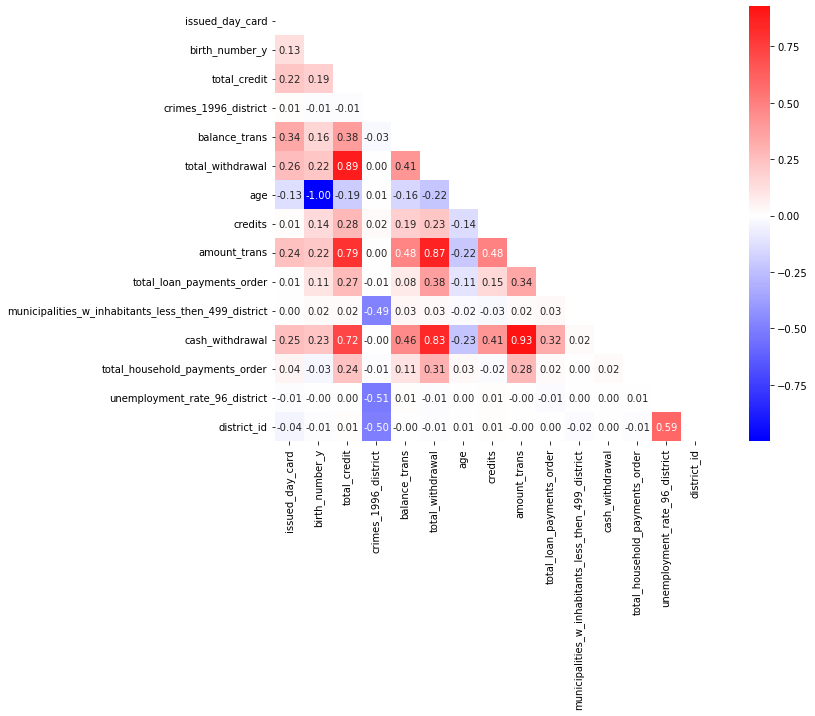

In [118]:
# Compute the correlation matrix for top vars
corr = base_table[x_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(14,8))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

In [119]:
base_table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_id,2239.0,2812.454667,2346.517861,1.0,1158.5,2379.0,3606.0,11382.0
bank_district_id,2239.0,37.748548,25.236180,1.0,14.0,39.0,61.0,77.0
acc_open_year,2239.0,1993.786512,0.871029,1993.0,1993.0,1993.0,1995.0,1995.0
acc_open_month,2239.0,6.586423,3.441002,1.0,4.0,7.0,10.0,12.0
acc_open_day,2239.0,14.859759,8.520699,1.0,8.0,14.0,22.0,30.0
...,...,...,...,...,...,...,...,...
birth_number_y,2239.0,542521.089326,171213.422446,180111.0,415912.0,550210.0,690862.5,826211.0
district_id,2239.0,37.736936,24.994173,1.0,15.0,39.0,60.0,77.0
birth_year_y,2239.0,1953.943278,17.102929,1918.0,1941.0,1955.0,1969.0,1982.0
birth_day_y,2239.0,15.685127,8.831736,1.0,8.0,16.0,24.0,31.0


In [120]:
#base_table.isna().sum().sum()
base_table.shape

(2239, 88)

In [121]:
#Export the base table as csv
base_table.to_csv("base_table.csv")

In [122]:
base_table.columns

Index(['account_id', 'bank_district_id', 'frequency', 'date', 'acc_open_year',
       'acc_open_month', 'acc_open_day', 'LOR', 'disp_id', 'client_id', 'type',
       'birth_number_x', 'client_district_id', 'birth_year_x', 'birth_day_x',
       'birth_month_x', 'gender_x', 'age', 'age_group', 'age_grp_desc',
       'total_credit', 'total_withdrawal', 'account_id_trans',
       'trans_id_trans', 'initial_transaction', 'latest_transaction',
       'amount_trans', 'balance_trans', 'credits', 'withdrawals',
       'cash_credit', 'credit_bank_transfer', 'cash_withdrawal', 'unknown',
       'remittance_bank_transfer_Withdrawal', 'credit_card_withdrawal',
       'account_id_order', 'order_count_order', 'recipient_bank_count_order',
       'recipient_account_count_order', 'total_payment_amount_order',
       'total_household_payments_order', 'total_loan_payments_order',
       ' total_insurance_payments_order', 'total_lease_payments_order',
       'total_unknown_payment_order', 'district_id_dis

### Data Analysis

In [123]:
###Average Salary by region###
# Create a pivot table calculating the mean average salary by region: 

pv_avg_sal_reg = district.pivot_table(index = 'region_district', values = 'average_salary_district', aggfunc = 'mean')
pv_avg_sal_reg = pv_avg_sal_reg.sort_values('average_salary_district', ascending = False)
pv_avg_sal_reg

,average_salary_district
region_district,
Prague,12541.000000
central Bohemia,9357.250000
north Bohemia,9334.200000
north Moravia,9049.181818
west Bohemia,9015.400000
south Bohemia,8831.500000
south Moravia,8728.500000
east Bohemia,8611.181818


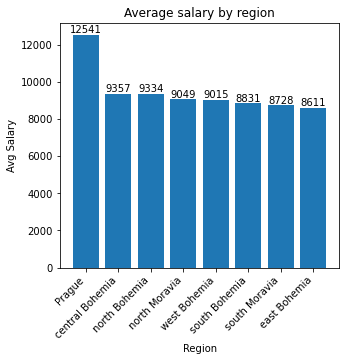

In [124]:
# Plot average salary by region using a vertical bar chart:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.bar(pv_avg_sal_reg.index, pv_avg_sal_reg['average_salary_district'])
fig.autofmt_xdate(rotation=45)
plt.title('Average salary by region')
plt.xlabel('Region')
plt.ylabel('Avg Salary')

rects = ax.patches

# A temp labels.
labels = pv_avg_sal_reg['average_salary_district'].astype(np.int64)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

plt.show()

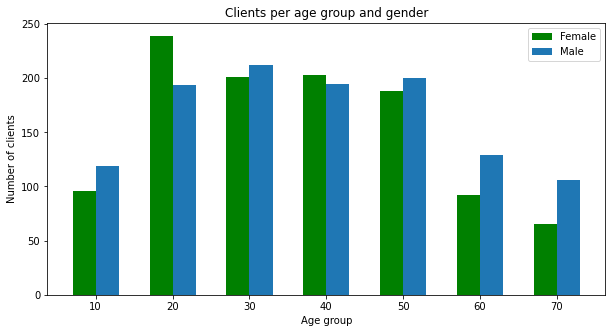

In [125]:
# Create a pivot table displaying the count of female and male clients per age group

pv_client_age = base_table.pivot_table(index='age_group',  # Group by
                               columns='gender_x',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
pv_client_age

# Plot the client age_group and gender:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pv_client_age.index, height=pv_client_age['F'], width=3, color='green')
plt.bar(pv_client_age.index + 3, height=pv_client_age['M'], width=3)

# Fix the tick label of x axis
plt.xticks(pv_client_age.index + 3/2, pv_client_age.index)

# Add label for the plot
plt.title('Clients per age group and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()



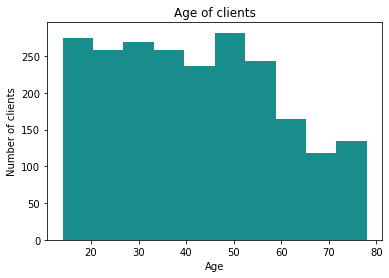

In [130]:
#Client age
plt.hist(base_table.age, 10, alpha=.9, color='teal')
# Add label for the plot
plt.title('Age of clients')
plt.xlabel('Age')
plt.ylabel('Number of clients')
plt.show()

In [131]:
base_table

,account_id,bank_district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,LOR,disp_id,client_id,...,issued_year_card,issued_month_card,issued_day_card,card_issued_in_97,birth_number_y,district_id,birth_year_y,birth_day_y,birth_month_y,gender_y
0,576,55,MONTHLY FEE,1993-01-01,1993,1,1,3,692,692,...,0.0,0.0,0.0,0.0,365111,74,1936,11,1,F
1,3818,74,MONTHLY FEE,1993-01-01,1993,1,1,3,4601,4601,...,0.0,0.0,0.0,0.0,350402,1,1935,2,4,M
2,704,55,MONTHLY FEE,1993-01-01,1993,1,1,3,844,844,...,0.0,0.0,0.0,0.0,450114,22,1945,14,1,M
3,2378,16,MONTHLY FEE,1993-01-01,1993,1,1,3,2873,2873,...,0.0,0.0,0.0,0.0,755324,16,1975,24,3,F
4,2632,24,MONTHLY FEE,1993-01-02,1993,1,2,3,3177,3177,...,0.0,0.0,0.0,0.0,380812,24,1938,12,8,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,FEE OF THE WEEK,1995-12-27,1995,12,27,1,5384,5384,...,0.0,0.0,0.0,0.0,350721,73,1935,21,7,M
2235,3814,74,MONTHLY FEE,1995-12-27,1995,12,27,1,4596,4596,...,0.0,0.0,0.0,0.0,735831,74,1973,31,8,F
2236,2780,63,MONTHLY FEE,1995-12-29,1995,12,29,1,3357,3357,...,1998.0,2.0,27.0,0.0,545721,63,1954,21,7,F
2237,3273,74,MONTHLY FEE,1995-12-29,1995,12,29,1,3962,3962,...,0.0,0.0,0.0,0.0,521128,74,1952,28,11,M


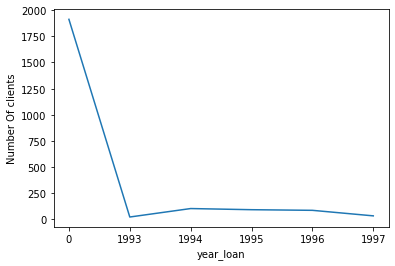

In [132]:
data = base_table.groupby('year_loan')['client_id'].agg('count')
data.plot.line()
plt.ylabel('Number Of clients')
plt.show()



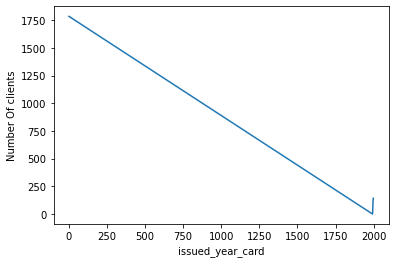

In [133]:
data = base_table.groupby('issued_year_card')['client_id'].agg('count')
data.plot.line()
plt.ylabel('Number Of clients')
plt.show()

In [134]:
#base_table.columns

In [135]:
#Card issued in 97 by region and avg salary
fig = px.bar(base_table, x="region_district", y="card_issued_in_97", color='average_salary_district')
fig.show()

In [150]:
#Sankey diagram, card issued basedon avg salary

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label =base_table.average_salary_district,
      color = "blue"
    ),
    link = dict(
      source = base_table.average_salary_district, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = base_table.card_issued_in_97,
      value = base_table.cash_credit
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [137]:
fig = go.Figure(data=[go.Scatter(
    x=base_table.amount_loan, y=base_table.region_district,
    mode='markers',)
])

fig.show()

In [138]:
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(base_table, path=[px.Constant("region_district"), 'district_name_district'], values='inhabitants_district',
                  color='district_name_district',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(base_table['inhabitants_district'], weights=base_table['inhabitants_district']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Number of clients per age group and gender

In [139]:
from matplotlib import pyplot as plt

In [140]:
# Create a pivot table displaying the count of female and male clients per age group

pv_client_age = base_table.pivot_table(index='age_group',  # Group by
                               columns='gender_x',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
pv_client_age

gender_x,F,M
age_group,,
10,96,119
20,239,194
30,201,212
40,203,195
50,188,200
60,92,129
70,65,106


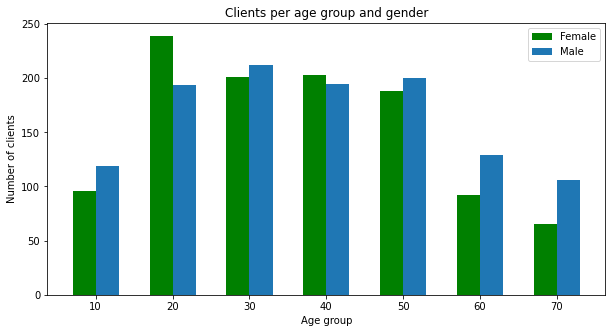

In [141]:
# Plot the client age_group and gender:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pv_client_age.index, height=pv_client_age['F'], width=3, color='green')
plt.bar(pv_client_age.index + 3, height=pv_client_age['M'], width=3)

# Fix the tick label of x axis
plt.xticks(pv_client_age.index + 3/2, pv_client_age.index)

# Add label for the plot
plt.title('Clients per age group and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()

# Average Salary by region

In [142]:
#check the mean average salary throughout the different regions
# Create a pivot table calculating the mean average salary by region: 

pv_avg_sal_reg = district.pivot_table(index = 'region_district', values = 'average_salary_district', aggfunc = 'mean')
pv_avg_sal_reg = pv_avg_sal_reg.sort_values('average_salary_district', ascending = False)

pv_avg_sal_reg

,average_salary_district
region_district,
Prague,12541.000000
central Bohemia,9357.250000
north Bohemia,9334.200000
north Moravia,9049.181818
west Bohemia,9015.400000
south Bohemia,8831.500000
south Moravia,8728.500000
east Bohemia,8611.181818


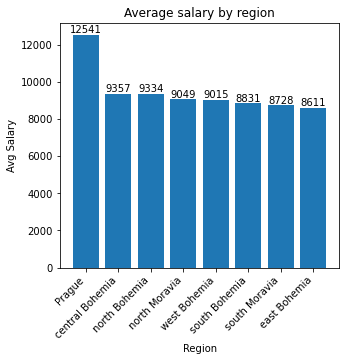

In [143]:
# Plot average salary by region using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.bar(pv_avg_sal_reg.index, pv_avg_sal_reg['average_salary_district'])
fig.autofmt_xdate(rotation=45)
plt.title('Average salary by region')
plt.xlabel('Region')
plt.ylabel('Avg Salary')

rects = ax.patches

# Make some labels.
labels = pv_avg_sal_reg['average_salary_district'].astype(np.int64)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

plt.show()

# Loan Amount By Loan status: 

In [144]:
import seaborn as sns

In [145]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(base_table.loc[base_table[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(base_table[col_name], order=sorted(base_table[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='status_desc_loan', data=base_table, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by loan status')
    else:
        data = base_table.groupby(col_name)['duration_loan'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "duration_loan", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('duration_loan')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



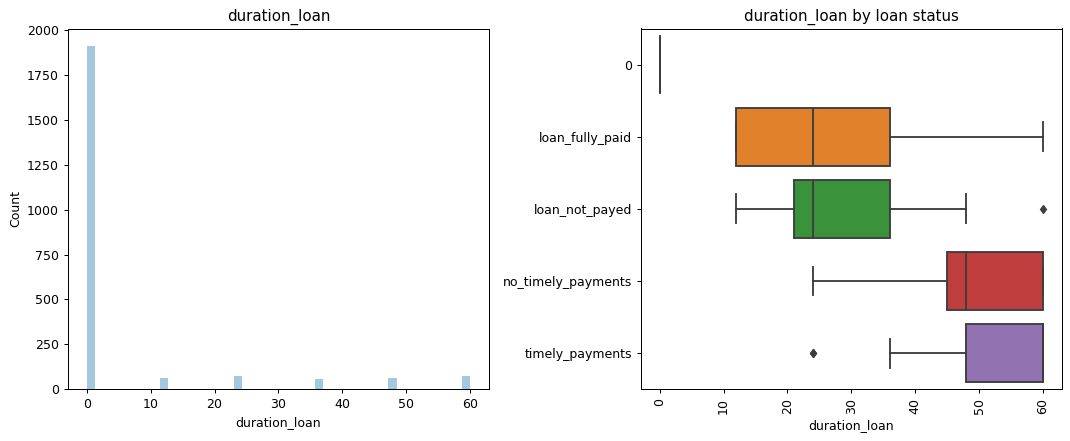

In [146]:
plot_feature('duration_loan', True)

# Duration of Loan by loan status

In [147]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(base_table.loc[base_table[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(base_table[col_name], order=sorted(base_table[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='status_desc_loan', data=base_table, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by status_loan')
    else:
        data = base_table.groupby(col_name)['amount_loan'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "amount_loan", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('amount_loan')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



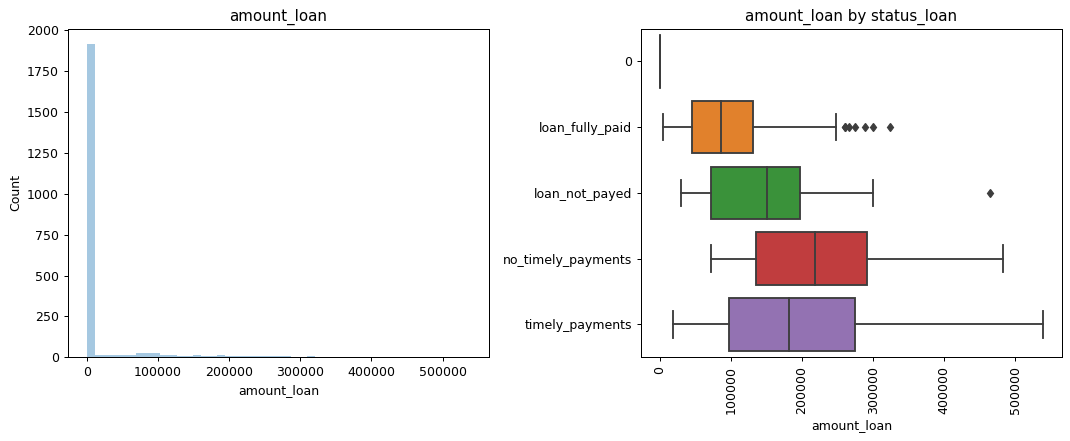

In [149]:
plot_feature('amount_loan', True)
plt.show()